# Project 1: Student Performance

## Introduction:


**Author**: Purinat33

**Dataset**: https://archive.ics.uci.edu/dataset/320/student+performance

## Objective:

The goal is to predict the performance of a given student (in 3 grades) in terms of:
* Regression (Where we predict the number directly)
* Classification (Where we bin the scores into different "Grades" and attempt to predict what class of grade)

For this task we will be using regression directly.

## Code

### Dataset Loading

In [84]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('data/student-mat.csv')
df

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."
...,...
390,"MS;""M"";20;""U"";""LE3"";""A"";2;2;""services"";""servic..."
391,"MS;""M"";17;""U"";""LE3"";""T"";3;1;""services"";""servic..."
392,"MS;""M"";21;""R"";""GT3"";""T"";1;1;""other"";""other"";""c..."
393,"MS;""M"";18;""R"";""LE3"";""T"";3;2;""services"";""other""..."


The dataset is `;` separated instead of comma separated. So we need to re-process it to contain `,`.

In [86]:
infile = 'data/student-mat.csv'
outfile = 'data/performance.csv'

with open(infile, 'r') as f:
    data = f.read()
    
data = data.replace(';',',')

with open(outfile, 'w') as wf:
    wf.write(data)

In [87]:
df = pd.read_csv('data/performance.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Only G3 (Final Grade) should be predicted. Both G1 and G2 are parts of the training data

### Dataset Inspection



#### Column Count

We want to make sure that categorical columns, like `Gender` doesn't contain typo or other errors.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

No null/empty data, moving on to each column

#### Column Frequency

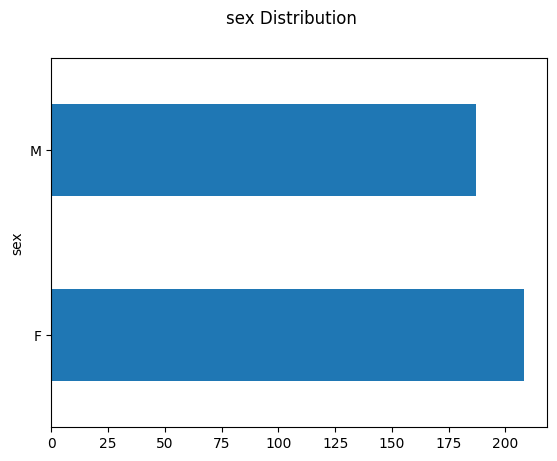

In [104]:
# Plotting the frequency of each value separated by gender
# https://stackoverflow.com/questions/50158081/how-to-create-overlay-bar-plot-in-pandas
fig, ax = plt.subplots()
df["sex"].value_counts().plot(kind='barh')
fig.suptitle("sex Distribution")

plt.show()

In [90]:
# Plotting the frequency of each value separated by gender
# https://stackoverflow.com/questions/50158081/how-to-create-overlay-bar-plot-in-pandas

# Exclude Gender column
cols = [c for c in df.columns if c != 'sex']

# Create a figure with enough subplots
n = len(cols)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(10, 4*n))

# If only one column, axes is not iterable, so wrap it
if n == 1:
    axes = [axes]

for ax, column in zip(axes, cols):
    # Male bars
    df.loc[df['sex'] == 'M', column].value_counts().plot(
        kind='barh', ax=ax, color='cyan', alpha=0.6, label='Male')

    # Female bars
    df.loc[df['sex'] == 'F', column].value_counts().plot(
        kind='barh', ax=ax, color='pink', alpha=0.6, label='Female')

    ax.set_title(f"{column} Distribution by Gender")
    ax.legend()

fig.tight_layout()
plt.savefig('out/graph.jpg') # Big plot, just gonna save it as a separate file.

### Preprocessing

#### Generate `X` (features) and `y` (target)

In [108]:
# Splitting into X and y arrays
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

Now that we have inspected the original data and found no irregularity like missing values, we can now start preprocessing for the machine learning process by:

1. Splitting: Splitting the `X` and `y` data into training and testing set
2. Encoding: Turning categorical data (e.g. `M`) into numerical data
    * Feature: `OneHotEncoder`

In [109]:
# Print out the columns that are categorical (Need encoding)
col_to_encode = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
col_to_encode

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [116]:
cat_cols_raw = X.select_dtypes(include=["object","category","bool"]).columns.tolist()
num_cols_all = X.select_dtypes(include=["number"]).columns.tolist()

# Split numeric into binary vs. real-valued (threshold = 2 unique values)
num_binary = [c for c in num_cols_all if X[c].nunique(dropna=False) == 2]
num_real   = [c for c in num_cols_all if X[c].nunique(dropna=False) > 2]

print("Categorical columns:", cat_cols_raw)
print("Numeric (binary)   :", num_binary)
print("Numeric (real)     :", num_real)

Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Numeric (binary)   : []
Numeric (real)     : ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [120]:
# The numerical data still aren't here
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# 1) Build preprocessor with scaling OFF for numeric-real (passthrough)
pre = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_raw),
        ("num_real", "passthrough", num_real),    # <-- off for now
        ("num_bin", "passthrough", num_binary),
    ],
    remainder="drop",
    verbose_feature_names_out=True
)

X_train_encoded = pre.fit_transform(X_train)
X_test_encoded  = pre.transform(X_test)

### Scaling of Data

Looking at the data

In [121]:
print(X_train_encoded[0])

[ 1.  0.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.
  0.  0.  1.  0.  1.  1.  0. 16.  0.  2.  1.  1.  0.  4.  3.  2.  2.  4.
  5.  0. 13. 15.]


Ignoring the categorical data being encoded as 0 or 1, the actual numerical data are on a different scale of 16 to 2. This might interfere with our model's performance. We can perform scaling to make all numerical data on the same scale.

In [122]:
pre.set_params(num_real=StandardScaler(with_mean=False))  # toggle on

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['school', 'sex', 'address', 'famsize',
                                  'Pstatus', 'Mjob', 'Fjob', 'reason',
                                  'guardian', 'schoolsup', 'famsup', 'paid',
                                  'activities', 'nursery', 'higher', 'internet',
                                  'romantic']),
                                ('num_real', StandardScaler(with_mean=False),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health', 'absences',
                                  'G1', 'G2']),
                                ('num_bin', 'passthrough', [])])

In [123]:
X_train_encoded = pre.fit_transform(X_train)
X_test_encoded  = pre.transform(X_test)

In [125]:
print(X_train_encoded[0])

[ 1.          0.          0.          1.          0.          1.
  1.          0.          0.          1.          0.          0.
  1.          0.          0.          0.          0.          1.
  0.          0.          0.          0.          1.          0.
  0.          1.          0.          1.          0.          1.
  0.          0.          1.          1.          0.          1.
  0.          0.          1.          0.          1.          1.
  0.         12.68169914  0.          1.84316682  1.43030142  1.1633253
  0.          4.58822592  2.89810035  1.81453331  2.32359785  3.08765592
  3.70920838  0.          3.94908301  3.98144108]


### Component Reduction (For Visualization)

The shape of our data:

In [126]:
print(X_train_encoded.shape)

(276, 58)


To plot the 58 features of all performance score is basically impossible. So we used a technique called **PCA** to create only 2 new features which can be used for plotting the relationship and distinction between the target classes

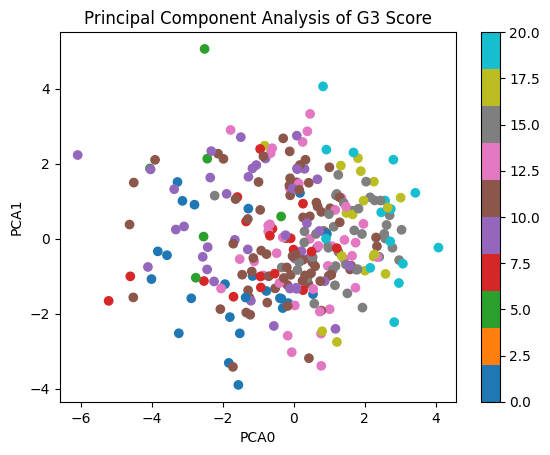

In [128]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_encoded)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train[:], cmap='tab10')

plt.title("Principal Component Analysis of G3 Score")
plt.xlabel("PCA0")
plt.colorbar()
plt.ylabel("PCA1")
plt.show()

The plot shows that the scores overlap, meaning that two features cannot describe G3 distribution with details.

#### Using a different technique to reduce the dimensionality of the data

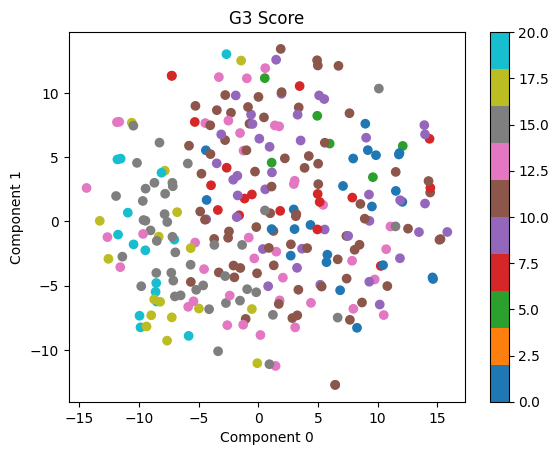

In [133]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=42)
X_tsne = tsne.fit_transform(X_train_encoded)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
                      c=y_train, cmap='tab10')
 

plt.title("G3 Score")
plt.xlabel("Component 0")
plt.ylabel("Component 1")
plt.colorbar()
plt.show()

In conclusion: Low-dimensional visualizations, through PCA or t-SNE, do not show clear scores separation; model performance likely relies on higher-dimensional interactions.

Read more on: www.link

### Clustering

Visualizing classes separation through a clustering unsupervised learning algorithm

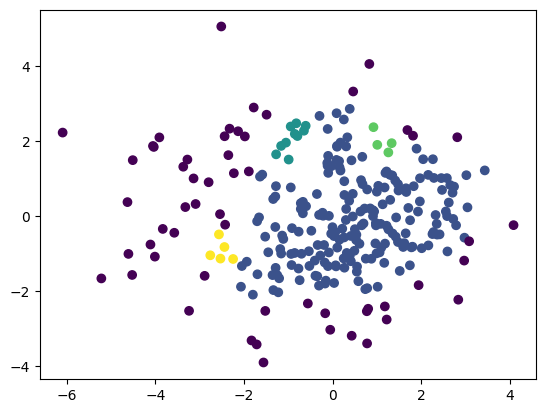

In [ ]:
from sklearn.cluster import DBSCAN

# https://www.askpython.com/python/examples/plot-k-means-clusters-python
# PCA is only for plotting the scale in 2D, the algorithm still takes in the full features
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_encoded)

dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
# plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='red', label='Cluster Center')
plt.show()

Using unsupervised algorithm like DBSCAN, the G3 scores can be clustered into distinct groups, which would likely behave the same as if we group the scores into a Grade class. We can see some sort of outliers in the clusters.

### Simple Machine Learning 

Now that we got the ideas of what the data is like, we can start making prediction by building a machine learning model.

#### Goal:

For simplicity sake, we want the model with the best accuracy, since we are not aiming for medical related diagnosis, recall and precision are not as important as accuracy. 

In regression problems, accuracy (how much the prediction differs from the actual label) can either use R-Squared or MAE. We want to approximate the best of both worlds for our model.

#### Dummy Classifier

Serves as a simple baseline to compare against other more complex classifiers.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

model = DummyClassifier(strategy='most_frequent')
model.fit(X_train_encoded, y_train_encoded)
print(
    f"Training Score: {(cross_val_score(model, X_train_encoded, y_train_encoded, cv=6).mean() * 100).round(3)}%")
print(
    f"Testing Score: {((model.score(X_test_encoded, y_test_encoded)) * 100)}%")

Training Score: 33.261%
Testing Score: 27.500000000000004%


We can interpret this as: "If the model always pick the class with the most frequent amount of occurrence, how accurate will this model be?"

#### Linear Models

Starting simple, we choose a linear model: Logistic Regression, which despite the name, is a classification algorithm.

The model works by finding coefficients to each feature.

Training Score: 50.641%
Testing Score: 47.5%


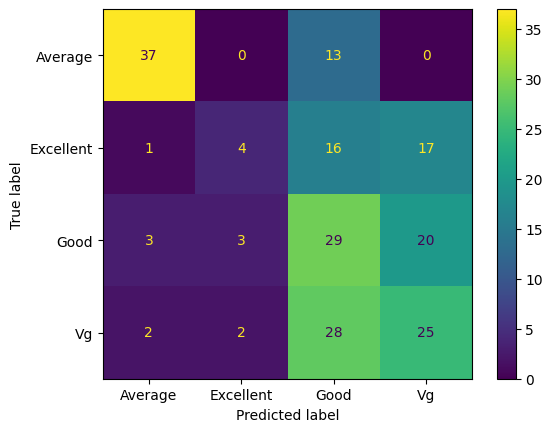

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

model = LogisticRegression()
model.fit(X_train_encoded, y_train_encoded)
print(
    f"Training Score: {(cross_val_score(model, X_train_encoded, y_train_encoded, cv=6).mean() * 100).round(3)}%")
print(
    f"Testing Score: {((model.score(X_test_encoded, y_test_encoded)) * 100)}%")

y_pred = model.predict(X_test_encoded)

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test_encoded, y_pred=y_pred), display_labels=encoderY.classes_).plot()
plt.show()

The performance is not great. We can inspect more than just the accuracy:

In [ ]:
print(classification_report(y_true=y_test_encoded, y_pred=y_pred, target_names=encoderY.classes_))

              precision    recall  f1-score   support

     Average       0.86      0.74      0.80        50
   Excellent       0.44      0.11      0.17        38
        Good       0.34      0.53      0.41        55
          Vg       0.40      0.44      0.42        57

    accuracy                           0.47       200
   macro avg       0.51      0.45      0.45       200
weighted avg       0.51      0.47      0.46       200



In [ ]:
# We're going to run the same code and plot the same graph many times, hence the function

def learn( model ):
    model.fit(X_train_encoded, y_train_encoded)
    print(
        f"Training Score: {(cross_val_score(model, X_train_encoded, y_train_encoded, cv=6).mean() * 100).round(3)}%")
    print(
        f"Testing Score: {((model.score(X_test_encoded, y_test_encoded)) * 100)}%")

    y_pred = model.predict(X_test_encoded)

    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test_encoded, y_pred=y_pred), display_labels=encoderY.classes_).plot()
    plt.show()
    print(classification_report(y_true=y_test_encoded, y_pred=y_pred, target_names=encoderY.classes_))

#### Tuning the model

There are several methods that can be performed to achieve better results:

1. Regularization (L1 & L2)
    * Adding penalties to large coefficients, forcing them to shrink down
2. Scaling 
    * Not applicable, since all our columns are categorically encoded (either 0 or 1)
    * At least not until we introduce actual numerical data (e.g. percentage score, weight, height etc.)
3. Feature Selection
4. Hyperparameter Tuning
5. Different Model Selection

##### Regularization (L1, L2)

Training Score: 51.068%
Testing Score: 48.0%


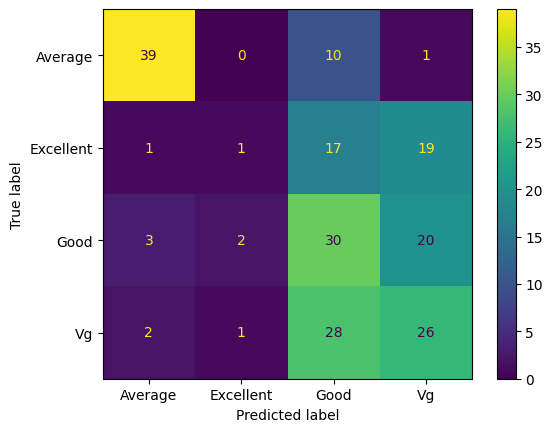

              precision    recall  f1-score   support

     Average       0.87      0.78      0.82        50
   Excellent       0.25      0.03      0.05        38
        Good       0.35      0.55      0.43        55
          Vg       0.39      0.46      0.42        57

    accuracy                           0.48       200
   macro avg       0.47      0.45      0.43       200
weighted avg       0.47      0.48      0.45       200



In [ ]:
learn(LogisticRegression(penalty='l1', solver='liblinear')) # L1 

Using L1 Regularization, in terms of accuracy, we see a minor level of performance improvement.

Training Score: 50.205%
Testing Score: 46.5%


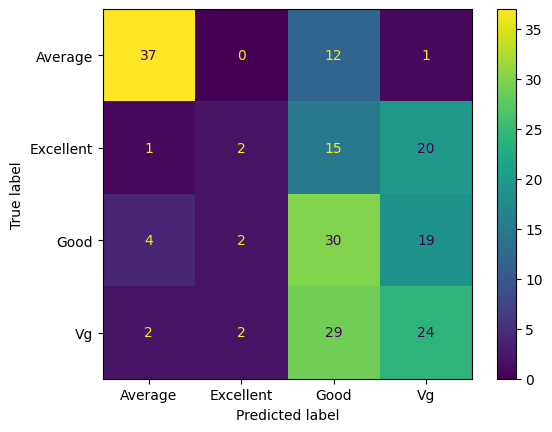

              precision    recall  f1-score   support

     Average       0.84      0.74      0.79        50
   Excellent       0.33      0.05      0.09        38
        Good       0.35      0.55      0.43        55
          Vg       0.38      0.42      0.40        57

    accuracy                           0.47       200
   macro avg       0.47      0.44      0.43       200
weighted avg       0.48      0.47      0.44       200



In [ ]:
learn(LogisticRegression(penalty='l2', solver='liblinear')) # L2 

The same could not be said for L2 Regularization, which behaved similarly to the Logistic Regression model without any parameters being set.

As a matter of fact, the Logistic Regression model has a default penalty being L2 Regularization, hence the performance.

#### Non-Linear Model: Support Vector Machine

Training Score: 52.575%
Testing Score: 49.0%


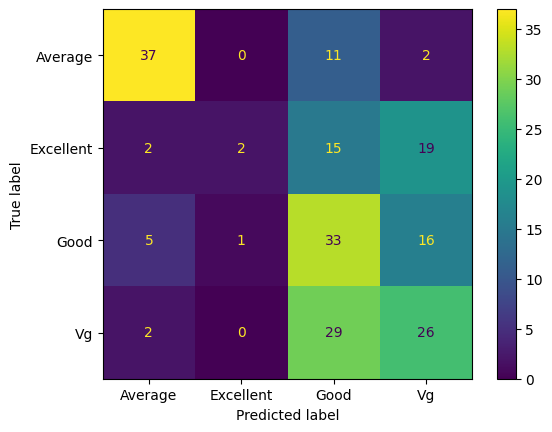

              precision    recall  f1-score   support

     Average       0.80      0.74      0.77        50
   Excellent       0.67      0.05      0.10        38
        Good       0.38      0.60      0.46        55
          Vg       0.41      0.46      0.43        57

    accuracy                           0.49       200
   macro avg       0.56      0.46      0.44       200
weighted avg       0.55      0.49      0.46       200



In [ ]:
from sklearn.svm import SVC

learn(SVC())

#### Non-Linear Model: Decision Tree

Training Score: 45.058%
Testing Score: 45.5%


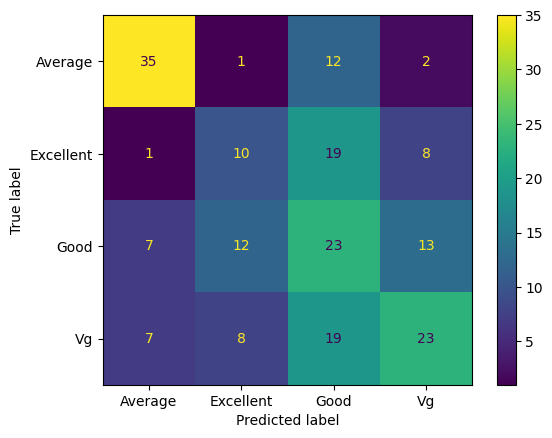

              precision    recall  f1-score   support

     Average       0.70      0.70      0.70        50
   Excellent       0.32      0.26      0.29        38
        Good       0.32      0.42      0.36        55
          Vg       0.50      0.40      0.45        57

    accuracy                           0.46       200
   macro avg       0.46      0.45      0.45       200
weighted avg       0.47      0.46      0.46       200



In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
learn(model)

#### Non-Linear Model: K-Nearest Neighbours

Training Score: 42.491%
Testing Score: 47.5%


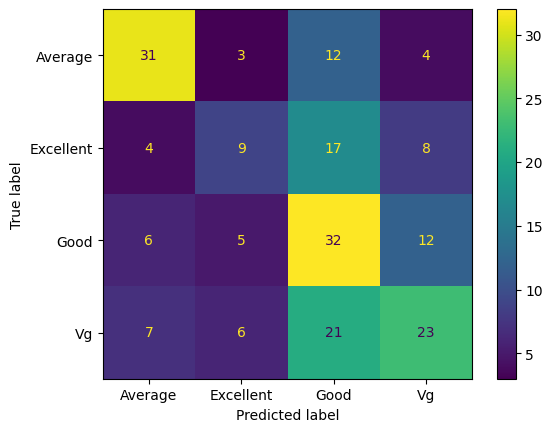

              precision    recall  f1-score   support

     Average       0.65      0.62      0.63        50
   Excellent       0.39      0.24      0.30        38
        Good       0.39      0.58      0.47        55
          Vg       0.49      0.40      0.44        57

    accuracy                           0.47       200
   macro avg       0.48      0.46      0.46       200
weighted avg       0.48      0.47      0.47       200



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

learn(KNeighborsClassifier())

#### Ensemble Model: Random Forest

Training Score: 49.356%
Testing Score: 45.0%


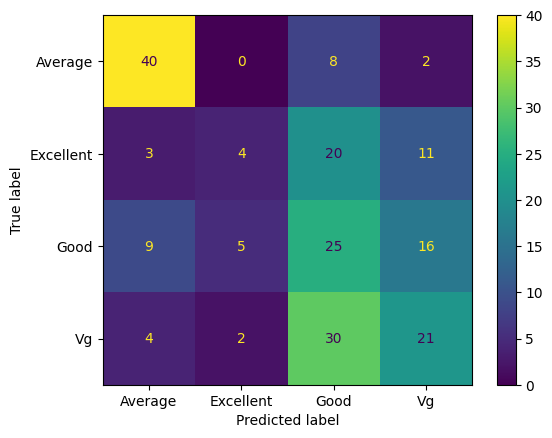

              precision    recall  f1-score   support

     Average       0.71      0.80      0.75        50
   Excellent       0.36      0.11      0.16        38
        Good       0.30      0.45      0.36        55
          Vg       0.42      0.37      0.39        57

    accuracy                           0.45       200
   macro avg       0.45      0.43      0.42       200
weighted avg       0.45      0.45      0.43       200



In [ ]:
from sklearn.ensemble import RandomForestClassifier

learn(RandomForestClassifier())

#### Ensemble Model: Gradient Boosting

Training Score: 47.841%
Testing Score: 49.0%


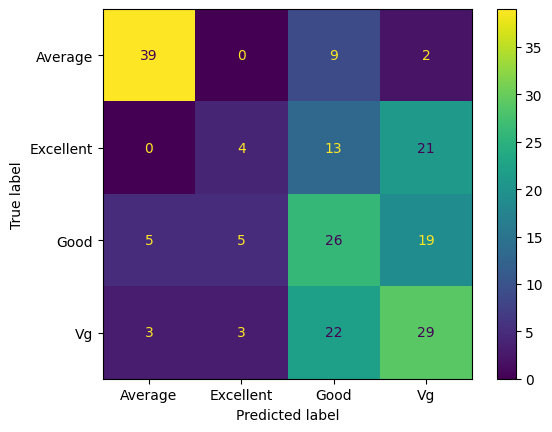

              precision    recall  f1-score   support

     Average       0.83      0.78      0.80        50
   Excellent       0.33      0.11      0.16        38
        Good       0.37      0.47      0.42        55
          Vg       0.41      0.51      0.45        57

    accuracy                           0.49       200
   macro avg       0.49      0.47      0.46       200
weighted avg       0.49      0.49      0.47       200



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

learn(GradientBoostingClassifier())

#### Recap:

So far, we've tried 7 different machine learning models:

* Logistic Regression
* Logistic Regression with L1 Regularization
* Support Vector Machine
* Decision Tree
* K-Nearest Neighbours
* Random Forest
* Gradient Boosting Classifier

All of the models had varying degrees of accuracy but the one with the best level of accuracy is Support Vector Machine, which we will used for future tuning and engineering. 

Training Score: 52.575%
Testing Score: 49.0%


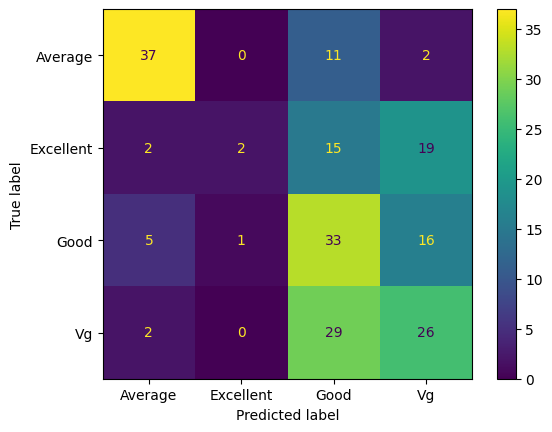

              precision    recall  f1-score   support

     Average       0.80      0.74      0.77        50
   Excellent       0.67      0.05      0.10        38
        Good       0.38      0.60      0.46        55
          Vg       0.41      0.46      0.43        57

    accuracy                           0.49       200
   macro avg       0.56      0.46      0.44       200
weighted avg       0.55      0.49      0.46       200



In [ ]:
from sklearn.svm import SVC

model = SVC()
learn(model=model)

We can now use two of the methods for tuning a model's performance on our chosen model:

1. Feature Selection
2. Hyperparameter Tuning

#### Feature Selection

Some features, despite being in the same dataset, are not as important as the others, and might actually be detrimental to the model's learning instead of helping it. In **linear models**, this can easily be visualized and explained through the coefficients of each feature, unlike SVM.

The following example shows feature selection in a linear model. A similar process will then be applied to the chosen SVM model.

Training data has 50.641025641025635% Accuracy


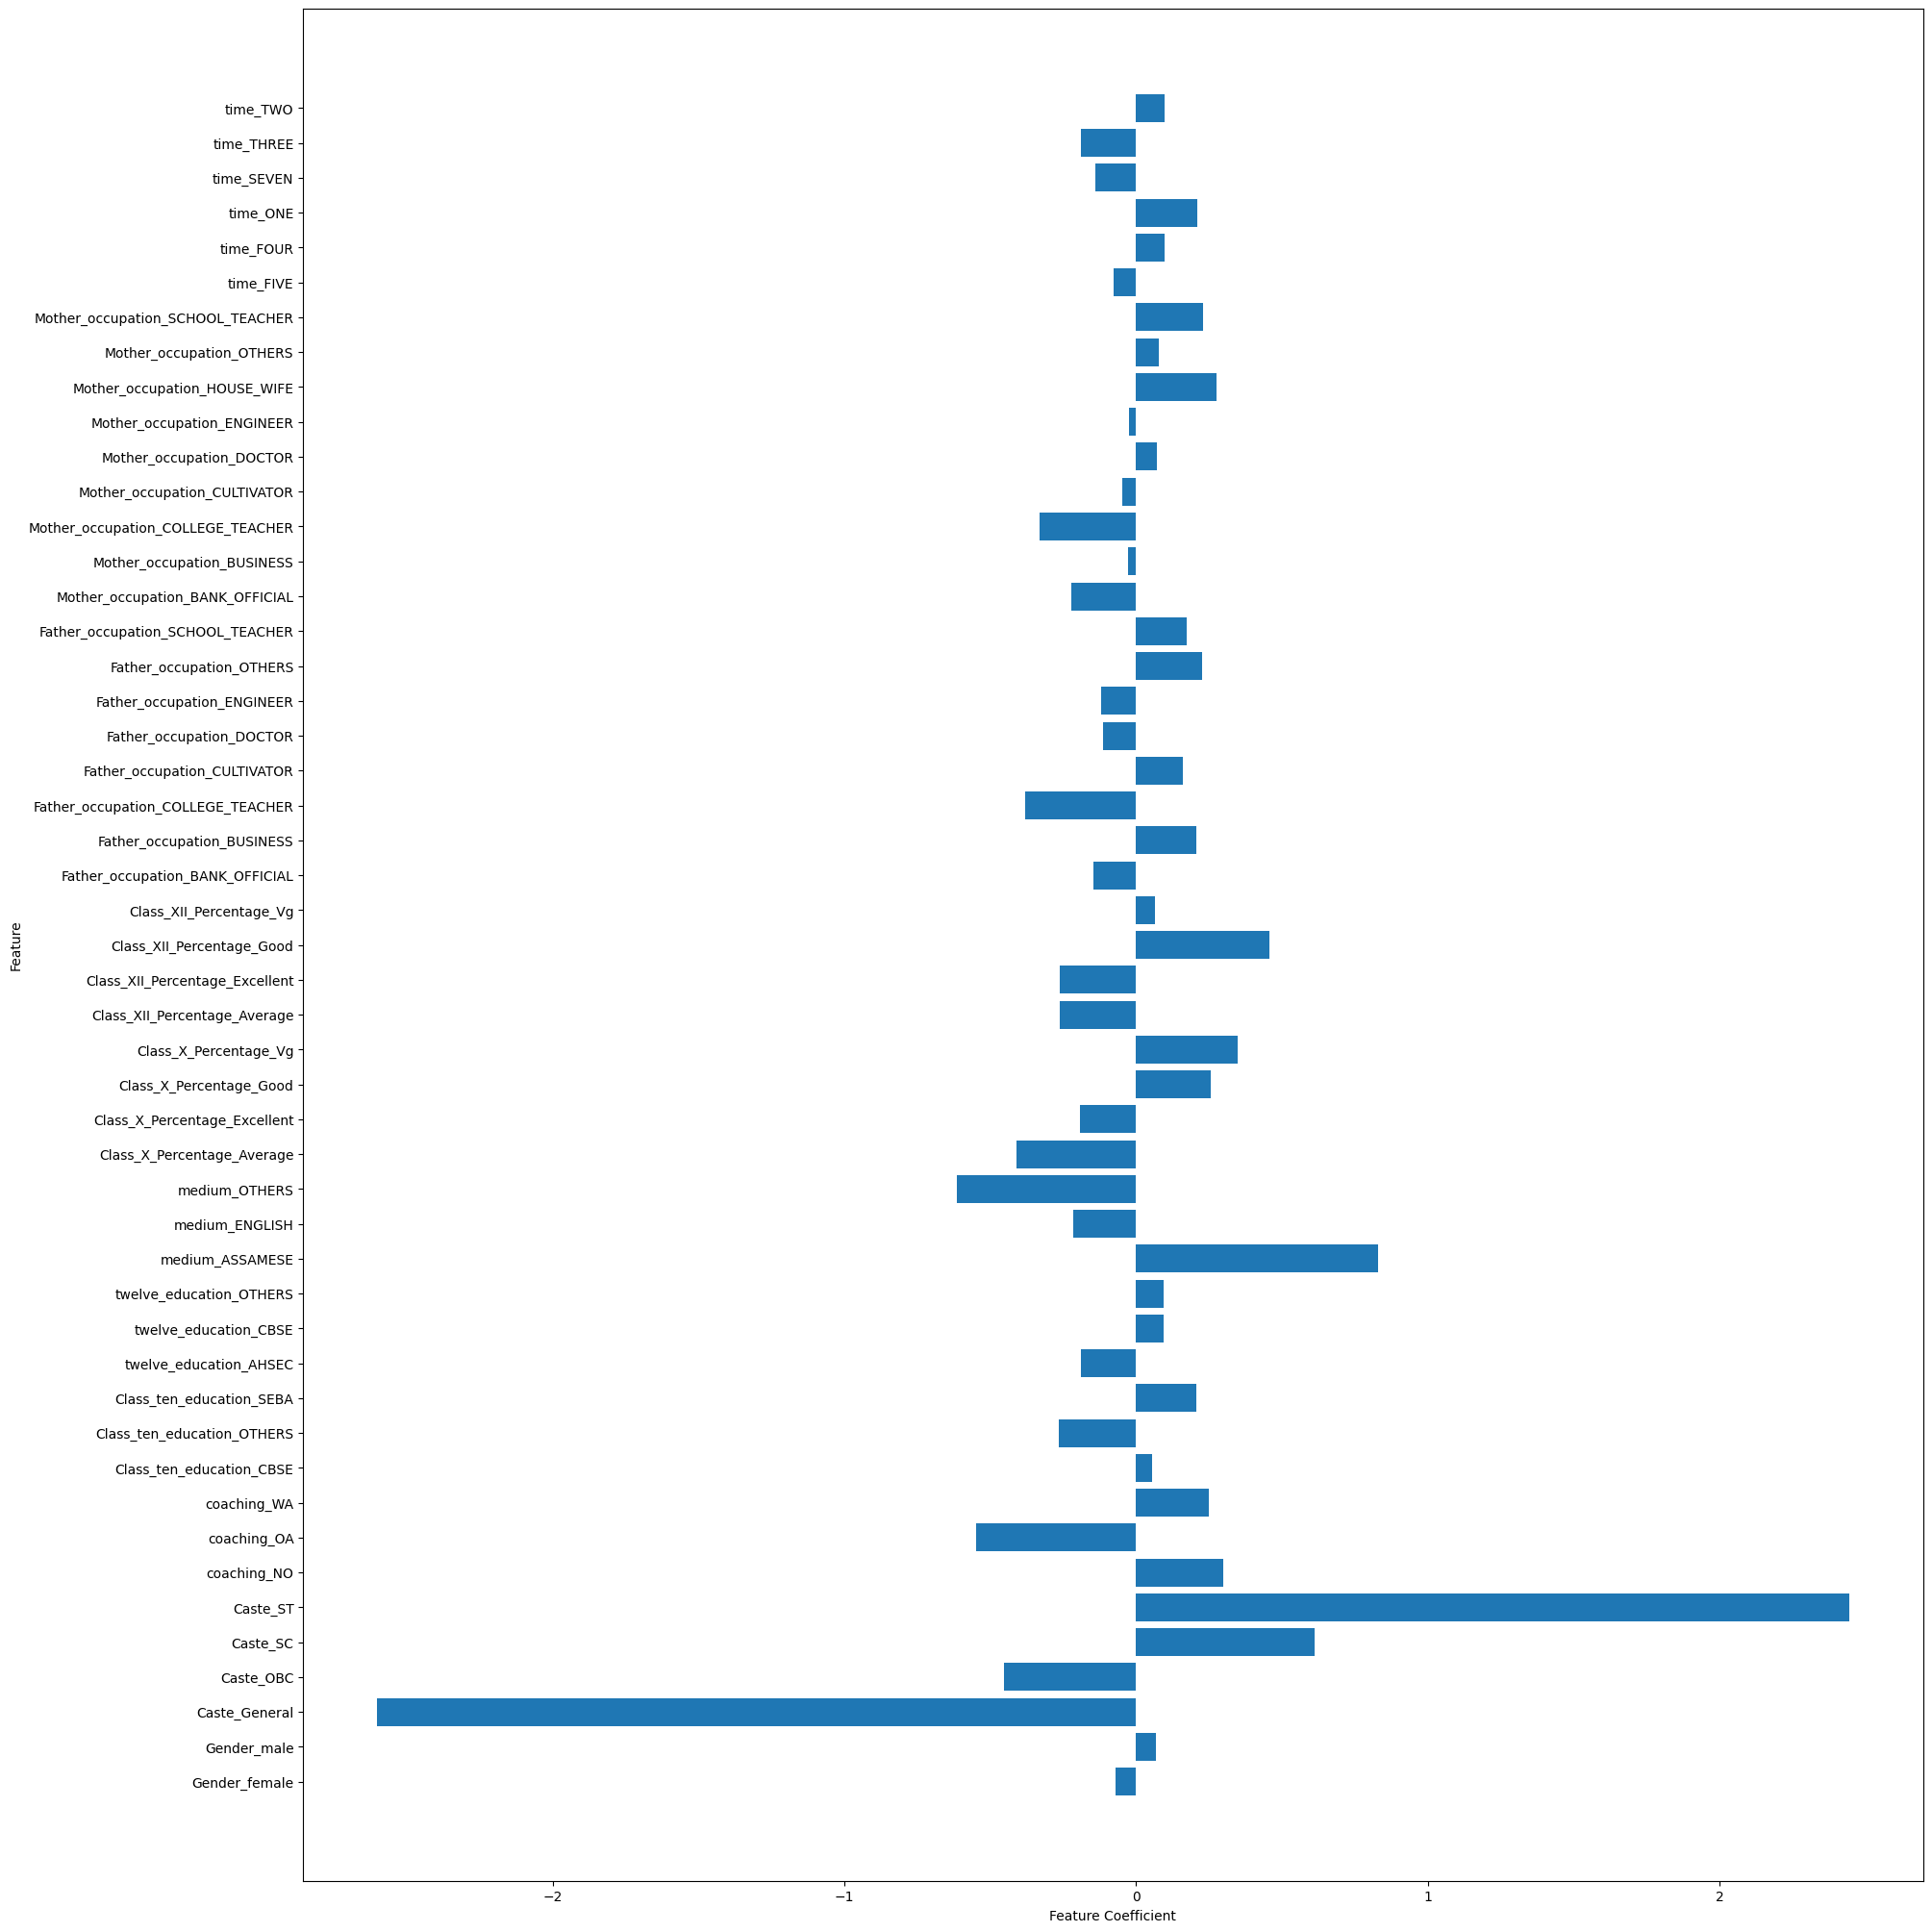

In [ ]:
# Example in Linear model
clf = LogisticRegression()
clf.fit(X_train_encoded, y_train_encoded)
print(f"Training data has {(cross_val_score(clf, X_train_encoded, y_train_encoded, cv=6).mean())*100}% Accuracy")

# Plotting
df_dummy = pd.get_dummies(df.iloc[:,0:-1])
plt.figure(figsize=(20,20))
plt.barh(range(X_train_encoded.shape[1]), clf.coef_[0])
plt.yticks(np.arange(X_train_encoded.shape[1]), df_dummy.columns.values)
plt.tight_layout()
plt.ylabel("Feature")
plt.xlabel("Feature Coefficient")
plt.show()

We can see that some features (e.g. Gender_male, Gender_female) have coefficients that are almost zero. We can drop these features and retrain the model for better performance.

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif, percentile=50) # Keep 50% of the features
X_train_encoded_selected = selector.fit_transform(X_train_encoded, y_train_encoded)
print(f"Before feature selection: {X_train_encoded.shape}")
print(f"After feature selection: {X_train_encoded_selected.shape}")

Before feature selection: (466, 49)
After feature selection: (466, 24)


In [ ]:
clf.fit(X_train_encoded_selected, y_train_encoded)
print(f"Training data has {(cross_val_score(clf, X_train_encoded_selected, y_train_encoded, cv=6).mean())*100}% Accuracy")

Training data has 51.925851925851916% Accuracy


An increase in performance can be seen.

In [ ]:
# Applying the same thing to SVC model
from sklearn.feature_selection import SelectKBest, f_oneway
print(f"Pre Feature Selection data has {(cross_val_score(model, X_train_encoded, y_train_encoded, cv=6).mean())*100}% Accuracy")

selector = SelectKBest(f_oneway, k=48) # Dropping one feature
X_train_encoded_selected = selector.fit_transform(X_train_encoded, y_train_encoded)
model.fit(X_train_encoded_selected, y_train_encoded)

print(f"Post Feature Selection data has {(cross_val_score(model, X_train_encoded_selected, y_train_encoded, cv=6).mean())*100}% Accuracy")

Pre Feature Selection data has 52.575202575202574% Accuracy
Post Feature Selection data has 52.577977577977585% Accuracy


In our SVM case, dropping 1 feature has a miniscule amount of improvement, any other number of dropping causes our model to perform worse than before.

#### Hyperparameter Tuning

A machine learning model comes with a set of parameters the user can modified (called hyperparameters).
Tuning these values can help with improving a model's performance

In [ ]:
# List of SVM parameters
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Any combination of these parameters can be changed.

Training Score: 48.923%
Testing Score: 44.0%


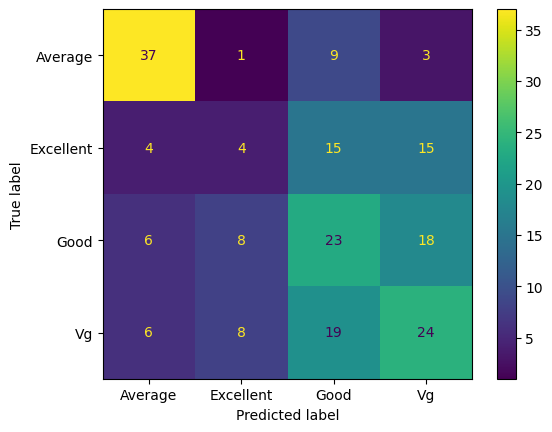

              precision    recall  f1-score   support

     Average       0.70      0.74      0.72        50
   Excellent       0.19      0.11      0.14        38
        Good       0.35      0.42      0.38        55
          Vg       0.40      0.42      0.41        57

    accuracy                           0.44       200
   macro avg       0.41      0.42      0.41       200
weighted avg       0.42      0.44      0.43       200



In [ ]:
C = 10
model = SVC(C=C)
learn(model)

##### Using Grid Search to Perform Tuning

An automated hyperparameter tuning technique in machine learning that systematically explores all possible combinations of specified hyperparameter values to find the best-performing model

In [ ]:
from sklearn.model_selection import GridSearchCV

print(f"Accuracy before Grid Search: {(cross_val_score(model, X_train_encoded_selected, y_train_encoded)*100).mean()}")
# Specify the values to be used
model = SVC()
param_grid = {
    "C": [0.0001, 0.001, 0.01, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')
grid.fit(X_train_encoded_selected, y_train_encoded)
# Since grid search perform CV, we can call `score` directly
print(f"Accuracy after Grid Search: {(grid.best_score_)*100}%")

Accuracy before Grid Search: 47.64584763212079
Accuracy after Grid Search: 52.3495767558911%


In [ ]:
# Find the best parameters 
print(grid.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [ ]:
# Final testing of the data
X_test_encoded_selected = selector.transform(X_test_encoded)
print(f"Final Testing: {grid.score(X_test_encoded_selected, y_test_encoded)*100}%")

Final Testing: 45.0%


#### Pipelining
 
The previous codes are a bit messy with various variables. For simplicity, we are going to wrap everythinginto a pipeline. 

Starting from the splitting, encoding, and model testing.

In [ ]:
df

,Gender,Caste,coaching,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,time,Performance
0,male,General,NO,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS,ONE,Excellent
1,male,OBC,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE,TWO,Excellent
2,male,OBC,OA,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE,TWO,Excellent
3,male,General,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER,ONE,Excellent
4,male,General,OA,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE,TWO,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...
661,female,ST,WA,SEBA,AHSEC,ENGLISH,Good,Vg,OTHERS,HOUSE_WIFE,ONE,Average
662,male,ST,WA,SEBA,AHSEC,ENGLISH,Vg,Good,CULTIVATOR,HOUSE_WIFE,THREE,Average
663,male,ST,WA,SEBA,CBSE,ENGLISH,Good,Vg,OTHERS,SCHOOL_TEACHER,TWO,Average
664,male,ST,WA,SEBA,AHSEC,ENGLISH,Good,Good,SCHOOL_TEACHER,HOUSE_WIFE,THREE,Average


In [ ]:
# Considering using Stratified since our classes are a little imbalanced
from sklearn.model_selection import StratifiedKFold

X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# The X_test and y_test would never be touched at all until the end
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import chi2

label = LabelEncoder()
y_train_encoded = label.fit_transform(y_train)
y_test_encoded = label.transform(y_test)

pipe = Pipeline([
    ('encoder_x', OneHotEncoder(handle_unknown="ignore")), # Encode X columns
    ('selector', SelectKBest(score_func=chi2)), # Select X features
    ('model', LogisticRegression(max_iter=2000)) # The Classifier
])

param_grid = {
    "selector__k": [10, 20, 30, 40, 45, 'all'],
    "model__C": [0.0001, 0.001, 0.01, 1, 10, 100, 1000],
    # 'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    # 'svc__gamma': ['scale', 'auto']
}

In [ ]:
print(f"Base Score: {((cross_val_score(pipe, X_train, y_train_encoded, cv=cv).mean())*100).round(3)}%")

Base Score: 51.684%


In [ ]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
)

grid.fit(X_train, y_train_encoded)
print(f"GridSearch Parameters: {grid.best_params_}")
print(f"GridSearch Score: {grid.best_score_ * 100}%")

GridSearch Parameters: {'selector__k': 30, 'svc__C': 1}
GridSearch Score: 56.4516129032258%


In [ ]:
print(f"Final Test Accuracy: {grid.best_estimator_.score(X_test, y_test_encoded) * 100}%")

Final Test Accuracy: 48.0%


## Summary and Closing Thought:

Despite the model being 48% at final evaluation and 56% during cross validation training, it is better than the baseline of 25% for each class.

The fact that the data is purely categorical without any numerical data might also contribute to the model's inability to learn any deeper connection in the data. I think:
1. Having more data than 666 rows
2. Having more columns
3. Having numerical data (both discrete and continuous) would increase the performance even more.

Whether the model can be used for production or not depends on the criticality of the accuracy. This model predicting on whether a student of given gender and other sociological status will perform averagely or greatly on their entrance exam would not need a very high accuracy and could be used if wanted, unlike if this is a medical diagnosis model.

More metrics interpretation can also be used, such as f1, recall, and precision.

## References:

1. O'Reily Introduction to Machine Learning with Python: A Guide for Data Scientists.
2. Cortez, P. (2008). Student Performance [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.